## Librerias

In [9]:
import pandas as pd 
from  pydynpd import regression
import numpy as np
import matplotlib.pyplot as plt
from linearmodels import PanelOLS
from linearmodels.panel import compare
import statsmodels.api as sm
import seaborn as sns
#from linearmodels.panel import PanelData
from linearmodels import RandomEffects
from scipy import stats
import linearmodels.panel as lm
from linearmodels import IVGMM

In [10]:
dir(lm)

['BetweenOLS',
 'FamaMacBeth',
 'FirstDifferenceOLS',
 'PanelOLS',
 'PooledOLS',
 'RandomEffects',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utility',
 'compare',
 'covariance',
 'data',
 'generate_panel_data',
 'model',
 'results',
 'utility']

## Data

In [11]:
data=pd.read_csv("Export_PE_CH.csv",sep=';')
# Crear un DataFrame de panel con MultiIndex

In [12]:
data.columns
a=['cmer','tcult','fbkf','terinter','tipca','pbi','fert']
for i in a:
    data[i]=data[i].str.replace(',','.').astype(np.float64) 

In [13]:
'''data.cmer=data.cmer.str.replace(',','.').astype(np.float64)
data.tcult=data.tclut.str.replace(',','.').astype(np.float64)
data.fbkf=data.fbkf.str.replace(',','.').astype(np.float64)'''

"data.cmer=data.cmer.str.replace(',','.').astype(np.float64)\ndata.tcult=data.tclut.str.replace(',','.').astype(np.float64)\ndata.fbkf=data.fbkf.str.replace(',','.').astype(np.float64)"

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   country   22 non-null     object 
 1   year      22 non-null     int64  
 2   cmer      22 non-null     float64
 3   tcult     22 non-null     float64
 4   fbkf      22 non-null     float64
 5   terinter  22 non-null     float64
 6   tipca     22 non-null     float64
 7   pbi       22 non-null     float64
 8   fert      22 non-null     float64
dtypes: float64(7), int64(1), object(1)
memory usage: 1.7+ KB


### Conversion de data

In [15]:
country=data.set_index(['country','year'])

In [16]:
country

cmer  tcult   fbkf  terinter   tipca    pbi         fert
country year                                                          
Chile   2010  0.25   1.71  23.02    121.33  510.34  217.1  376000143.5
        2011  0.29   1.77  24.72    109.50  483.65  251.2  517211763.9
        2012  0.24   1.73  26.75     97.85  486.63  267.2  558395412.0
        2013  0.25   1.76  26.35     97.24  495.09  277.2  517055740.1
        2014  0.25   1.73  25.47    103.43  570.08  259.4  460957606.5
        2015  0.27   1.77  25.47    108.92  654.05  242.5  520534401.1
        2016  0.30   1.71  24.13    108.24  676.80  249.3  326656477.3
        2017  0.20   1.72  22.26    111.03  649.21  276.4  360231229.5
        2018  0.21   1.63  23.05    109.56  640.94  295.4  449090792.9
        2019  0.18   1.57  24.52     99.93  702.78  278.5  443533354.0
        2020  0.15   1.61  22.55    113.96  792.35  254.1  394184078.6
Peru    2010  0.03   3.79  23.51    119.49    2.83  147.5  379361352.1
        2011  0.03   3.82  23.35    122.42    2.75  171.8  557880664.4
        2012  0.16   3.85  25.04    109.97    2.63  192.6  585703396.0
        2013  0.00   3.65  25.30     98.26    2.72  201.2  522645070.7
        2014  0.01   3.45  24.54     91.63    2.85  200.8  499790439.1
        2015  0.03   3.26  23.09     87.35    3.20  189.8  529184711.1
        2016  0.06   2.97  21.45     99.75    3.38  191.9  369647378.3
        2017  0.10   2.94  20.61    111.25    3.25  211.0  538768164.3
        2018  0.13   2.98  20.92    109.45    3.29  222.6  456846838.8
        2019  0.19   2.80  20.97    106.54    3.34  228.3  499035710.1
        2020  0.23   2.80  19.89    107.47    3.51  201.9  496982263.3

In [17]:
country.columns

Index(['cmer', 'tcult', 'fbkf', 'terinter', 'tipca', 'pbi', 'fert'], dtype='object')

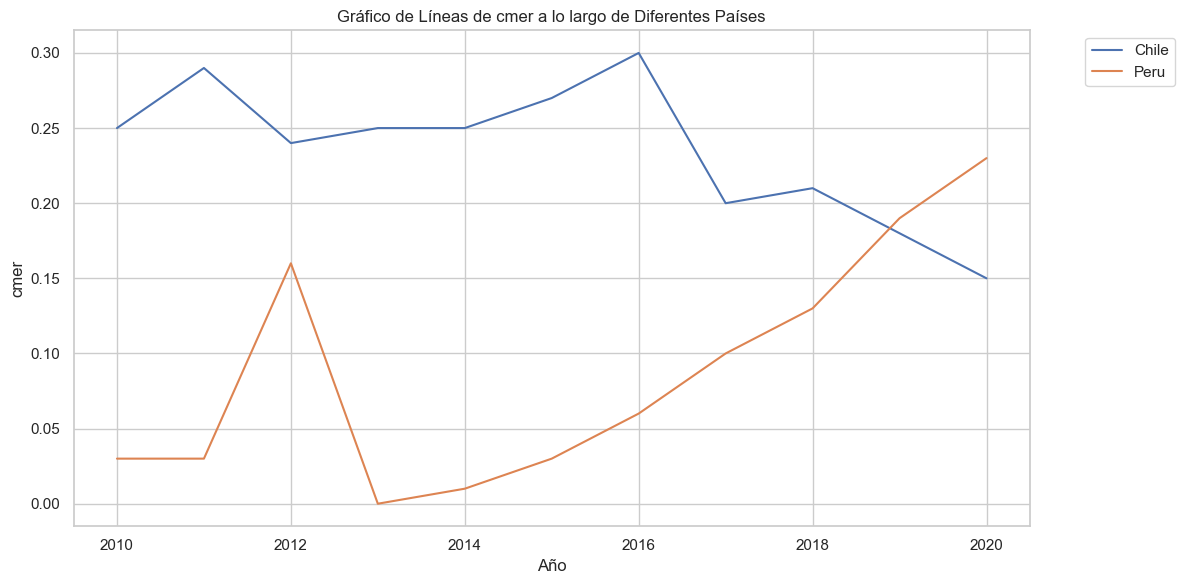

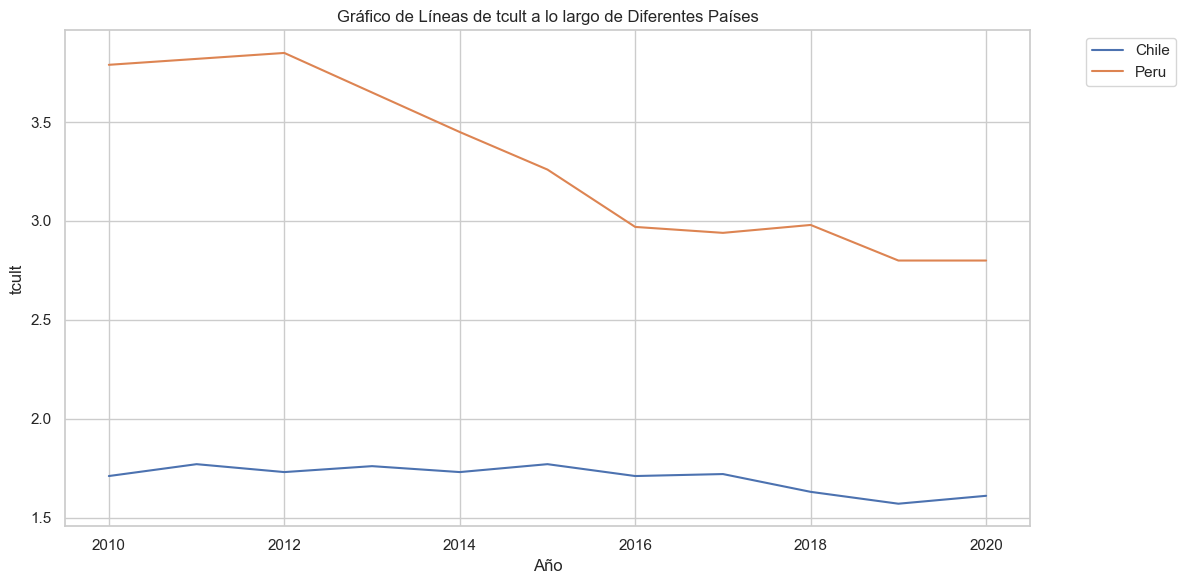

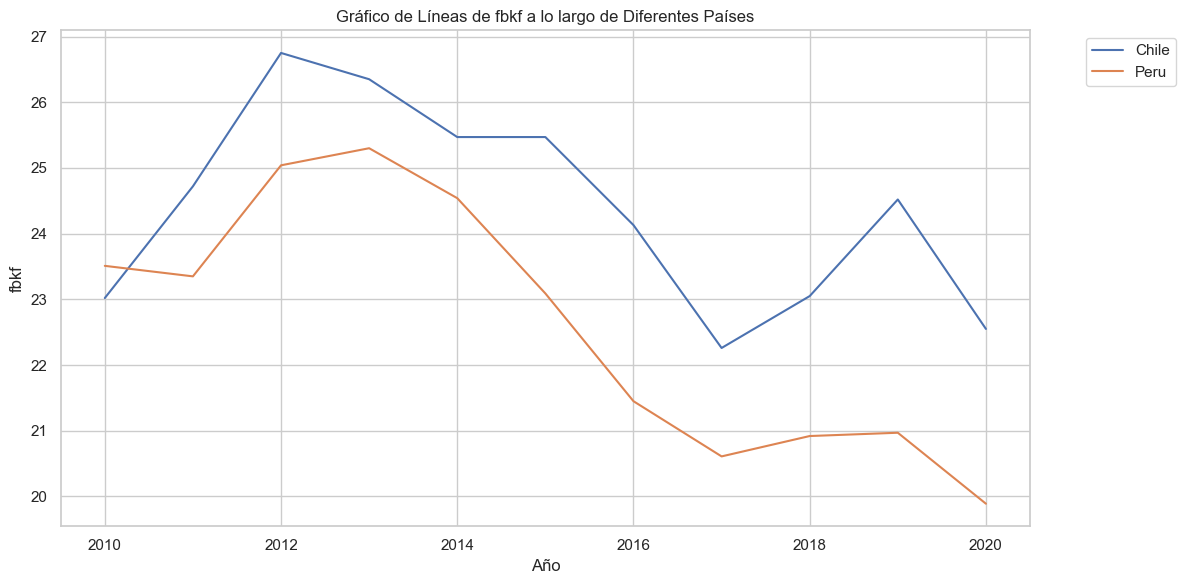

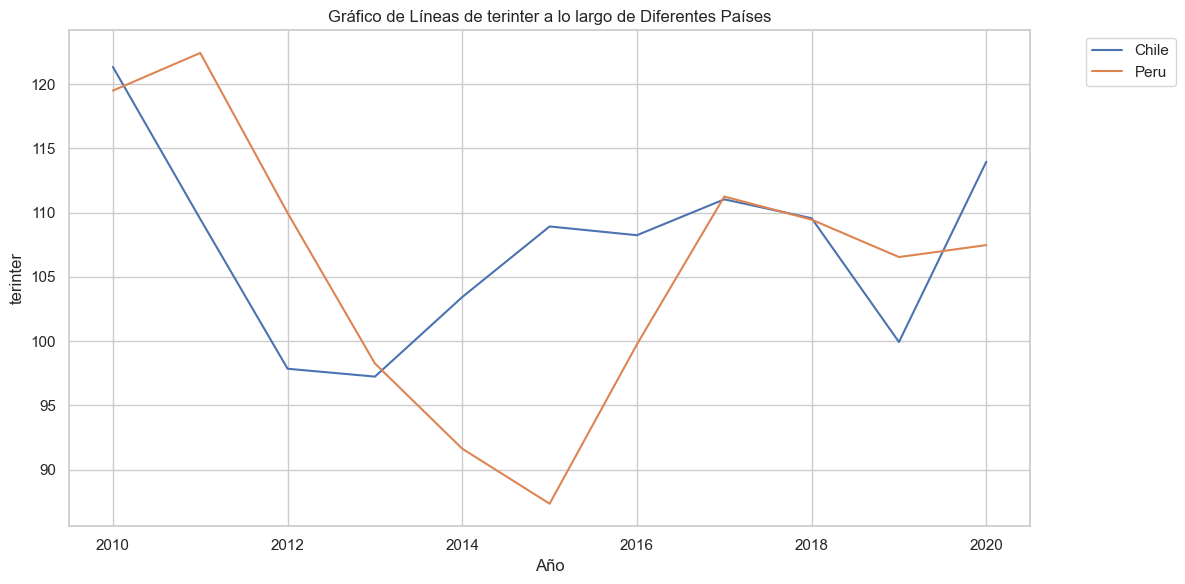

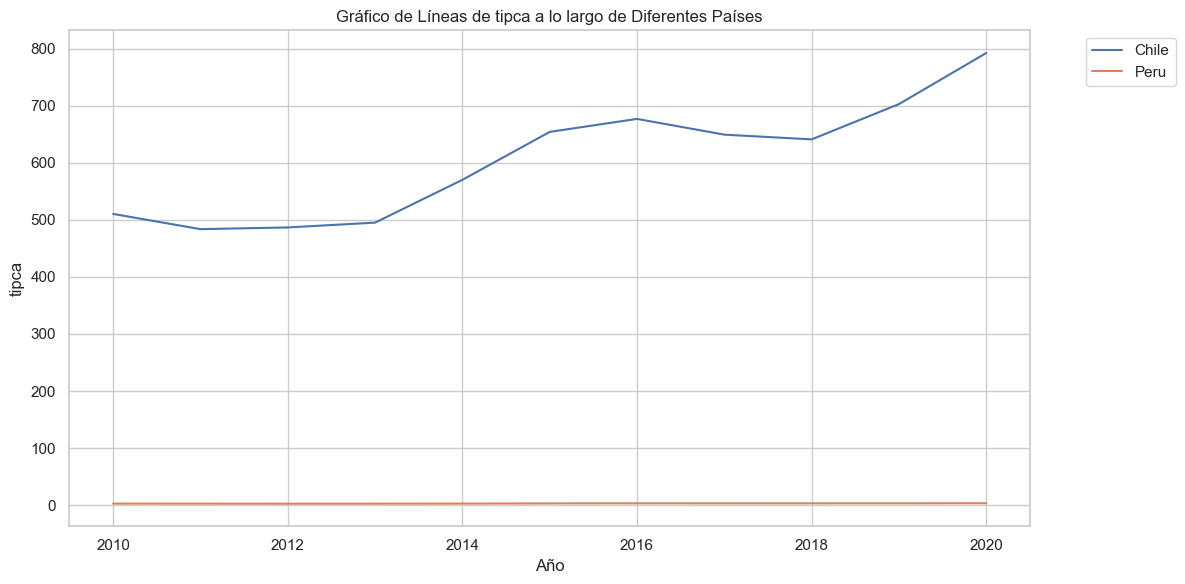

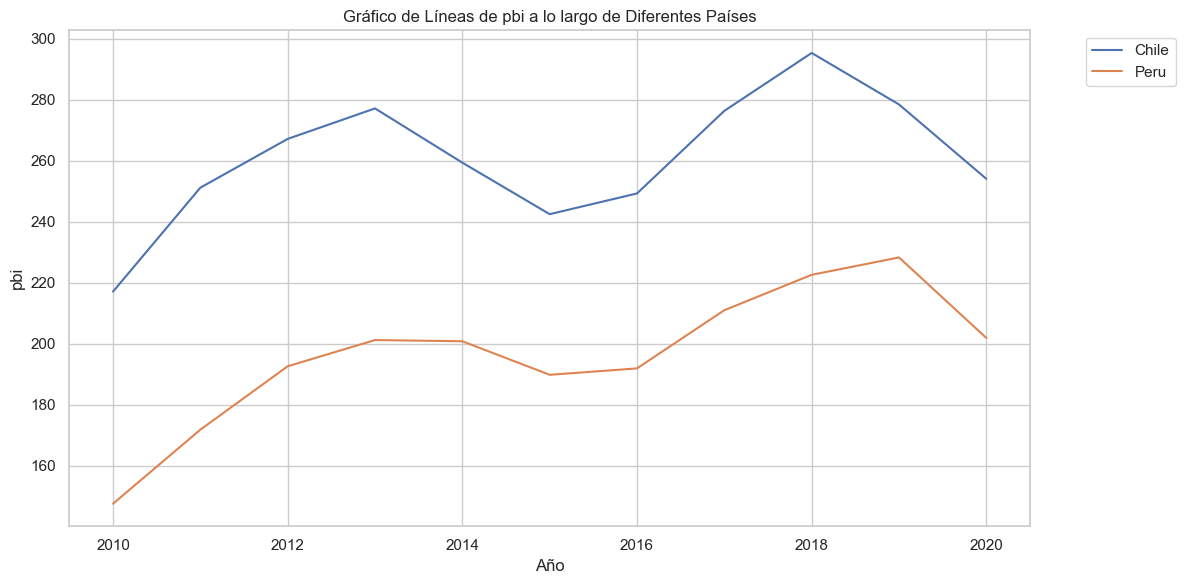

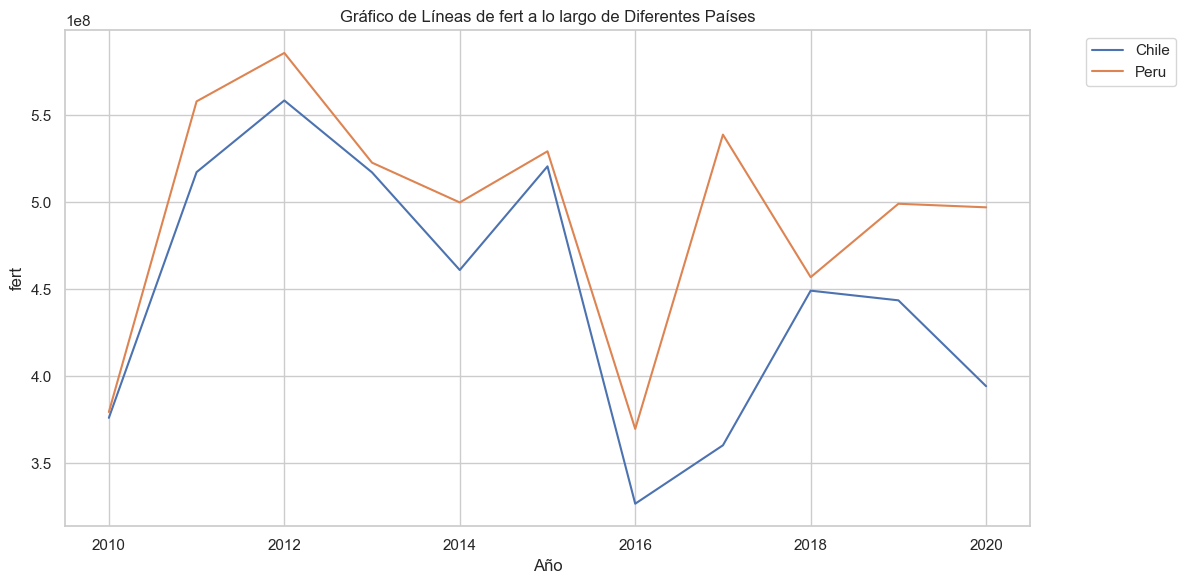

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
a= ['cmer', 'tcult', 'fbkf', 'terinter', 'tipca', 'pbi', 'fert']

for var in a:
    variable = var
    plt.figure(figsize=(12, 6))
    sns.set(style="whitegrid")
    sns.lineplot(data=country, x='year', y=variable, hue='country')
    plt.xlabel('Año')
    plt.ylabel(variable)
    plt.title(f'Gráfico de Líneas de {variable} a lo largo de Diferentes Países')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


## Prueba de tratamiento de datos

In [19]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
for variable in country.columns:
    
    grupos = country.groupby('country')[variable]
    for grupo, datos in grupos:
        resultado_adf = adfuller(datos)
        estadistico, p_valor, _, _, valores_criticos, _ = resultado_adf

        print(f"Variable: {variable}, Grupo: {grupo}")
        print(f"Estadístico ADF: {estadistico}")
        print(f"Valor p: {p_valor}")
        print(f"Valores Críticos: {valores_criticos}")
        
        
        if p_valor < 0.05:
            print("La variable es estacionaria.")
        else:
            print("La variable no es estacionaria.")
        print("-" * 40)


Variable: cmer, Grupo: Chile
Estadístico ADF: -0.8629259649973547
Valor p: 0.7999362054558176
Valores Críticos: {'1%': -4.331573, '5%': -3.23295, '10%': -2.7487}
La variable no es estacionaria.
----------------------------------------
Variable: cmer, Grupo: Peru
Estadístico ADF: -1.0008854869974775
Valor p: 0.7529412031680578
Valores Críticos: {'1%': -4.331573, '5%': -3.23295, '10%': -2.7487}
La variable no es estacionaria.
----------------------------------------
Variable: tcult, Grupo: Chile
Estadístico ADF: -0.7614196364546539
Valor p: 0.8301929787987231
Valores Críticos: {'1%': -4.331573, '5%': -3.23295, '10%': -2.7487}
La variable no es estacionaria.
----------------------------------------
Variable: tcult, Grupo: Peru
Estadístico ADF: -0.3909912791044113
Valor p: 0.9115920800238113
Valores Críticos: {'1%': -4.331573, '5%': -3.23295, '10%': -2.7487}
La variable no es estacionaria.
----------------------------------------
Variable: fbkf, Grupo: Chile
Estadístico ADF: -2.73485243439

#### Correlacion de los datos

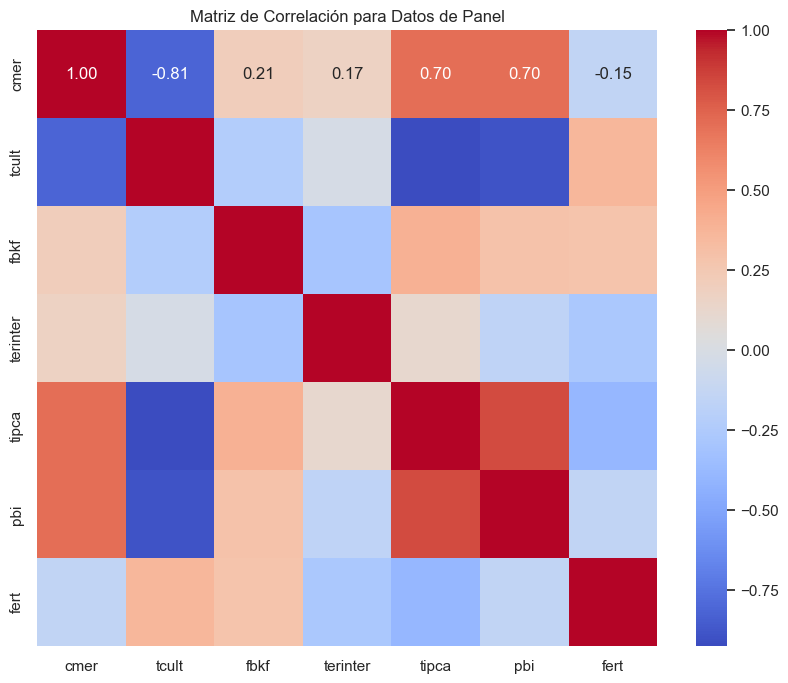

In [20]:
cor=country.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(cor, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación para Datos de Panel')
plt.show()

## Modelado

### Modelo Pool

In [21]:
mod_pool=PanelOLS.from_formula('cmer ~ tcult + fbkf + terinter + tipca + pbi + fert',data=country).fit()

In [22]:
mod_pool.summary

Dep. Variable:,cmer,R-squared:,0.9422
Estimator:,PanelOLS,R-squared (Between):,1.0000
No. Observations:,22,R-squared (Within):,0.4613
Date:,"Mon, Oct 23 2023",R-squared (Overall):,0.9422
Time:,15:12:35,Log-likelihood,36.883
Cov. Estimator:,Unadjusted,,
,,F-statistic:,43.439
Entities:,2,P-value,0.0000
Avg Obs:,11.000,Distribution:,"F(6,16)"
Min Obs:,11.000,,
Max Obs:,11.000,F-statistic (robust):,43.439


## Modelo de Efectos Fijos

In [23]:
model_fe = PanelOLS.from_formula('cmer ~ tcult + fbkf + terinter + tipca + pbi + fert + EntityEffects', data=country)
model_fe = model_fe.fit(cov_type='kernel', kernel='bartlett')
model_fe.summary

Dep. Variable:,cmer,R-squared:,0.4713
Estimator:,PanelOLS,R-squared (Between):,-2.2845
No. Observations:,22,R-squared (Within):,0.4713
Date:,"Mon, Oct 23 2023",R-squared (Overall):,-1.9886
Time:,15:12:35,Log-likelihood,37.089
Cov. Estimator:,Driscoll-Kraay,,
,,F-statistic:,2.0798
Entities:,2,P-value,0.1215
Avg Obs:,11.000,Distribution:,"F(6,14)"
Min Obs:,11.000,,
Max Obs:,11.000,F-statistic (robust):,23.336


In [24]:
'''model_fe = sm.OLS(country['cmer'], sm.add_constant(country[['tcult', 'fbkf', 'terinter', 'tipca', 'pbi', 'fert']])).fit(cov_type='cluster', cov_kwds={'groups': country.index.get_level_values(0)})
print("Modelo de Efectos Fijos:")
print(model_fe.summary())'''

'model_fe = sm.OLS(country[\'cmer\'], sm.add_constant(country[[\'tcult\', \'fbkf\', \'terinter\', \'tipca\', \'pbi\', \'fert\']])).fit(cov_type=\'cluster\', cov_kwds={\'groups\': country.index.get_level_values(0)})\nprint("Modelo de Efectos Fijos:")\nprint(model_fe.summary())'

## Modelo de efectos aleatorios

In [25]:
model_re = RandomEffects.from_formula('cmer ~ tcult + fbkf + terinter + tipca + pbi + fert', data=country)
model_re = model_re.fit(cov_type='clustered', cluster_entity=True)
model_re.summary

Dep. Variable:,cmer,R-squared:,0.9422
Estimator:,RandomEffects,R-squared (Between):,1.0000
No. Observations:,22,R-squared (Within):,0.4613
Date:,"Mon, Oct 23 2023",R-squared (Overall):,0.9422
Time:,15:12:35,Log-likelihood,36.883
Cov. Estimator:,Clustered,,
,,F-statistic:,43.439
Entities:,2,P-value,0.0000
Avg Obs:,11.000,Distribution:,"F(6,16)"
Min Obs:,11.000,,
Max Obs:,11.000,F-statistic (robust):,-1.706e+17


In [26]:
hausman_test = compare({'Fijos': model_fe, 'Aleatorios': model_re}, precision='pvalues')

# Obtiene el estadístico de la prueba de Hausman
hausman_statistic = hausman_test

# Obtiene el valor p de la prueba de Hausman
p_value = hausman_test
p_value
# Imprime los resultados de la prueba de Hausman
print("Estadístico de la prueba de Hausman:", hausman_statistic)
print("Valor p de la prueba de Hausman:", p_value)

# Conclusión de la prueba de Hausman
if p_value < 0.05:
    print("Conclusión: Rechazamos la hipótesis nula, lo que sugiere que los efectos aleatorios son inapropiados.")
else:
    print("Conclusión: No rechazamos la hipótesis nula, lo que sugiere que los efectos aleatorios son apropiados.")

Estadístico de la prueba de Hausman:                       Model Comparison                      
                                     Fijos        Aleatorios
------------------------------------------------------------
Dep. Variable                         cmer              cmer
Estimator                         PanelOLS     RandomEffects
No. Observations                        22                22
Cov. Est.                   Driscoll-Kraay         Clustered
R-squared                           0.4713            0.9422
R-Squared (Within)                  0.4713            0.4613
R-Squared (Between)                -2.2845            1.0000
R-Squared (Overall)                -1.9886            0.9422
F-statistic                         2.0798            43.439
P-value (F-stat)                    0.1215            0.0000
=====================     ================   ===============
tcult                              -0.2101           -0.1780
                                  (0.0019)      

TypeError: '<' not supported between instances of 'PanelModelComparison' and 'float'

In [ ]:
hausman_test = compare({'Fijos': model_fe, 'Aleatorios': model_re}, precision='std_errors')
hausman_test.summary

,Fijos,Aleatorios
Dep. Variable,cmer,cmer
Estimator,PanelOLS,RandomEffects
No. Observations,22,22
Cov. Est.,Driscoll-Kraay,Clustered
R-squared,0.4713,0.9422
R-Squared (Within),0.4713,0.4613
R-Squared (Between),-2.2845,1.0000
R-Squared (Overall),-1.9886,0.9422
F-statistic,2.0798,43.439
P-value (F-stat),0.1215,0.0000


In [ ]:
a

['cmer', 'tcult', 'fbkf', 'terinter', 'tipca', 'pbi', 'fert']

In [ ]:
hausman_test = compare({'Fijos': model_fe, 'Aleatorios': model_re}, precision='std_errors')
hausman_test.pvalues

,Fijos,Aleatorios
tcult,0.001877,0.000000e+00
fbkf,0.088488,1.116664e-01
terinter,0.000141,1.649791e-12
tipca,0.290062,3.953359e-05
pbi,0.768768,1.873135e-06
fert,0.565405,4.787474e-01


In [ ]:
dw_hausman_test = compare({'Fijos': model_fe, 'Aleatorios': model_re}, precision='tstats')
print(dw_hausman_test.summary)
'''# Obtiene el estadístico de la prueba Durbin-Wu-Hausman
dw_hausman_statistic = dw_hausman_test['chi2'][0]

# Obtiene el valor p de la prueba Durbin-Wu-Hausman
dw_p_value = dw_hausman_test['p_value'][0]

# Imprime los resultados de la prueba Durbin-Wu-Hausman
print("Estadístico de la prueba Durbin-Wu-Hausman:", dw_hausman_statistic)
print("Valor p de la prueba Durbin-Wu-Hausman:", dw_p_value)

# Conclusión de la prueba Durbin-Wu-Hausman
if dw_p_value < 0.05:
    print("Conclusión: Rechazamos la hipótesis nula, lo que sugiere que los efectos aleatorios son inapropiados.")
else:
    print("Conclusión: No rechazamos la hipótesis nula, lo que sugiere que los efectos aleatorios son apropiados.")'''

                      Model Comparison                      
                                     Fijos        Aleatorios
------------------------------------------------------------
Dep. Variable                         cmer              cmer
Estimator                         PanelOLS     RandomEffects
No. Observations                        22                22
Cov. Est.                   Driscoll-Kraay         Clustered
R-squared                           0.4713            0.9422
R-Squared (Within)                  0.4713            0.4613
R-Squared (Between)                -2.2845            1.0000
R-Squared (Overall)                -1.9886            0.9422
F-statistic                         2.0798            43.439
P-value (F-stat)                    0.1215            0.0000
=====================     ================   ===============
tcult                              -0.2101           -0.1780
                                 (-3.8197)         (-52.454)
fbkf                    

'# Obtiene el estadístico de la prueba Durbin-Wu-Hausman\ndw_hausman_statistic = dw_hausman_test[\'chi2\'][0]\n\n# Obtiene el valor p de la prueba Durbin-Wu-Hausman\ndw_p_value = dw_hausman_test[\'p_value\'][0]\n\n# Imprime los resultados de la prueba Durbin-Wu-Hausman\nprint("Estadístico de la prueba Durbin-Wu-Hausman:", dw_hausman_statistic)\nprint("Valor p de la prueba Durbin-Wu-Hausman:", dw_p_value)\n\n# Conclusión de la prueba Durbin-Wu-Hausman\nif dw_p_value < 0.05:\n    print("Conclusión: Rechazamos la hipótesis nula, lo que sugiere que los efectos aleatorios son inapropiados.")\nelse:\n    print("Conclusión: No rechazamos la hipótesis nula, lo que sugiere que los efectos aleatorios son apropiados.")'

In [ ]:
residuals = mod_pool.resids


from statsmodels.stats.stattools import durbin_watson
durbin_watson_statistic = durbin_watson(residuals)
print("Estadístico de Durbin-Watson:", durbin_watson_statistic)


from scipy.stats import norm

p_valor = 2 * (1 - norm.cdf(abs(durbin_watson_statistic)))
print("P-valor para la prueba de Durbin-Watson:", p_valor)


Estadístico de Durbin-Watson: 1.7135966870143218
P-valor para la prueba de Durbin-Watson: 0.08660282243264317


In [ ]:
d=country.columns
d=d.drop('cmer')
d

Index(['tcult', 'fbkf', 'terinter', 'tipca', 'pbi', 'fert'], dtype='object')

## Modelo Panel GMM en Diferencias 

In [36]:
from linearmodels.iv import IVGMM



# Define tu ecuación de regresión
formula = 'cmer ~ 1 + tcult + fbkf + terinter + tipca + pbi + fert'

# Crea un modelo GMM en diferencias
model = IVGMM.from_formula(formula, country, weights=None)

# Ajusta el modelo
results = model.fit()

# Imprime los resultados
print(results)


                          IV-GMM Estimation Summary                           
Dep. Variable:                   cmer   R-squared:                      0.7798
Estimator:                     IV-GMM   Adj. R-squared:                 0.6917
No. Observations:                  22   F-statistic:                    226.55
Date:                Mon, Oct 23 2023   P-value (F-stat)                0.0000
Time:                        15:20:14   Distribution:                  chi2(6)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept     -0.1464     0.3748    -0.3905     0.6962     -0.8809      0.5882
tcult         -0.1738     0.0416    -4.1763     0.00

In [38]:
results = model.fit(cov_type='kernel', kernel='bartlett')
results.summary

<class 'linearmodels.compat.statsmodels.Summary'>
"""
                          IV-GMM Estimation Summary                           
==============================================================================
Dep. Variable:                   cmer   R-squared:                      0.7798
Estimator:                     IV-GMM   Adj. R-squared:                 0.6917
No. Observations:                  22   F-statistic:                    1299.4
Date:                Mon, Oct 23 2023   P-value (F-stat)                0.0000
Time:                        15:21:13   Distribution:                  chi2(6)
Cov. Estimator:                kernel                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept     -0.1464     0.1578    -0.9273     0.3538     -0.4557      0.1630
tcult         -0.1738     0.0206    -8.4378     0.0000     -0.2141     -0.1334
fbkf           0.0132     0.0046     2.9067     0.0037      0.0043      0.0222
terinter       0.0039     0.0005     8.0403     0.0000      0.0030      0.0049
tipca         -0.0003  5.293e-05    -5.0321     0.0000     -0.0004     -0.0002
pbi            0.0001     0.0002     0.5704     0.5684     -0.0003      0.0005
fert        1.447e-10  1.147e-10     1.2609     0.2073  -8.021e-11   3.695e-10
==============================================================================
"""

In [ ]:
model = IVGMM.from_formula('cmer~1+tcult+fbkf+terinter+tipca+pbi+fert', country, weights=None, 
                        differenced=True, has_time_dummies=False, 
                        kernel='bartlett', force_gls=True)

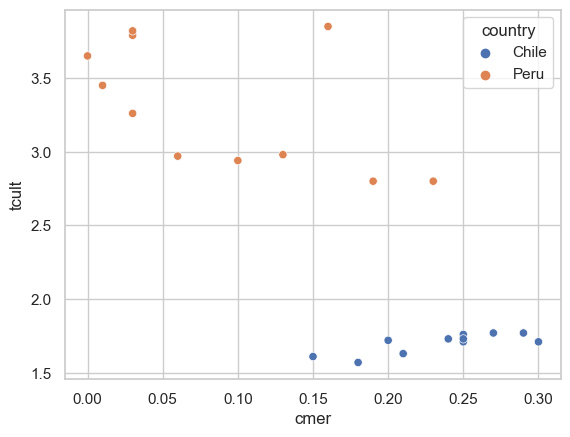

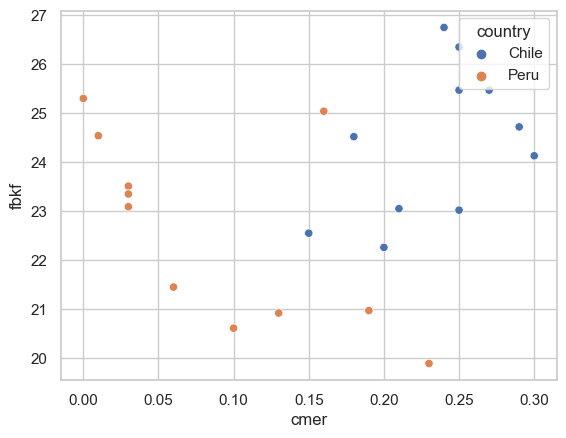

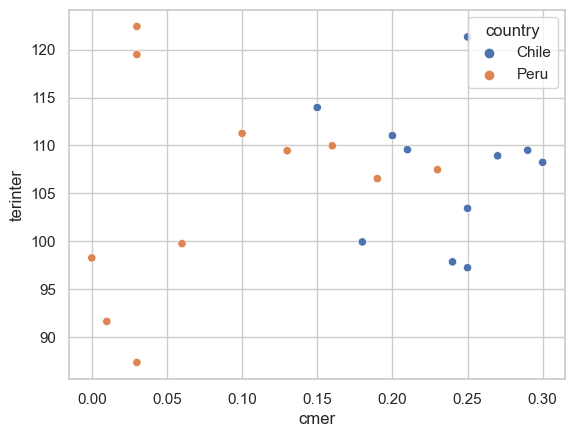

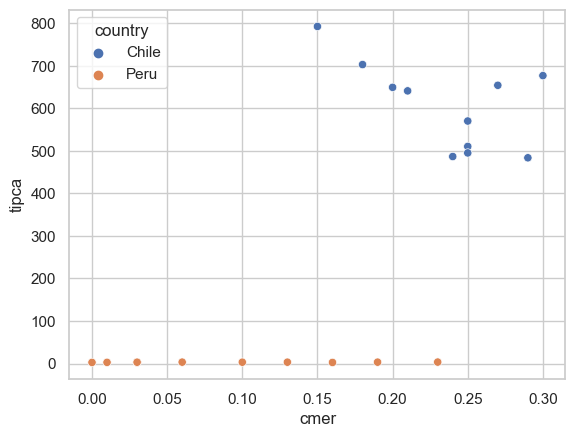

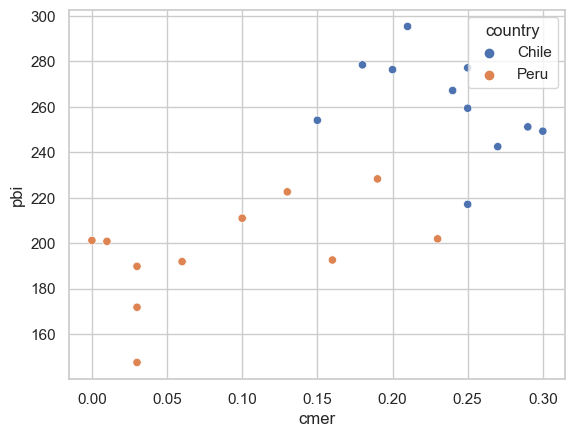

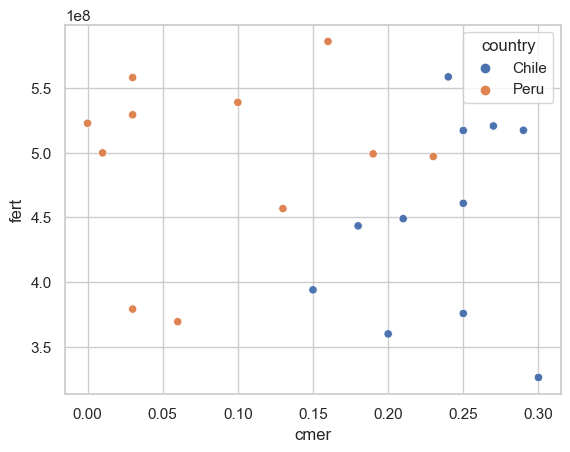

In [ ]:
for e in d:
    sns.scatterplot(x=data['cmer'],y=data[e],hue=data['country'])
    plt.show()